# Dimension Reduction - Principal Component Analysis (PCA)
- Principal Component Analysis (PCA) was performed to reduce the number of dimensions and reduce model runtime while retaining the most explained varaince. For this analysis, the threshold was set to 95%, meaning the selected principal components would explain 95% of the variance in data.
- 157 product categories were reduced to 71

## Import Depdendencies and Data

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.3)
from sklearn.decomposition import PCA

In [2]:
cust_train_rescale = pd.read_csv('../Outputs/customer_order_train_rescale.csv', index_col='user_id')

print(f'There are {len(cust_train_rescale):,} customers in training data set')
cust_train_rescale.head(5)

There are 20,168 customers in training data set


,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,international,meat seafood,missing_y,other_y,pantry,personal care,pets,produce,snacks,organic
user_id,,,,,,,,,,,,,,,,,,,,,
19510,0.0,0.0,0.0,0.0,0.0,0.0,-0.25,0.0,0.0,0.0,...,-0.333333,-0.250,0.0,0.0,-0.466667,3.50,0.0,0.202532,-0.04,0.929293
147319,0.0,0.5,0.0,0.0,0.0,1.0,0.00,2.0,0.0,0.0,...,0.666667,0.000,1.0,0.0,-0.333333,-0.25,0.0,-0.531646,-0.36,-0.373737
85028,0.0,4.0,0.0,3.0,126.0,0.0,0.00,0.0,0.0,0.0,...,3.333333,1.125,0.0,1.0,2.333333,-0.25,0.0,1.430380,1.36,0.080808
72168,0.0,0.0,0.0,0.0,0.0,0.0,0.75,0.0,0.0,0.0,...,0.333333,-0.125,0.0,0.0,0.066667,0.50,0.0,-0.215190,0.64,0.333333
142535,0.0,0.5,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.666667,0.375,0.0,0.0,-0.266667,0.75,0.0,-0.607595,-0.40,-0.595960


## Plot variance by number of principal components
95% of the variance can be explained by less than 71 principal components

In [3]:
# Plot cumulative variance by number of principal components
def plotPCAvariance(data, n_components):
    model = PCA().fit(data)
    
    sns.set()
    fig, ax = plt.subplots(figsize=(8,6))
    xi = np.arange(1, n_components + 1, step=1)
    y = np.cumsum(model.explained_variance_ratio_)*100

    plt.ylim(0.0,110)
    plt.plot(xi, y, marker='o', linestyle='--', color='b')

    plt.xlabel('Number of Principal Components')
    plt.xticks(np.arange(0, n_components + 10, step=10))
    plt.ylabel('Cumulative variance (%)')
    plt.title('Number of components needed to explain variance')

    plt.axhline(y=95, color='r', linestyle='-')
    plt.text(0.5, 85, '95% threshold', color = 'red', fontsize=16)

    ax.grid(b=True, which='major', axis='both')
    
    plt.tight_layout()
    plt.savefig('../Outputs/PCA_variance.png')
    plt.show()

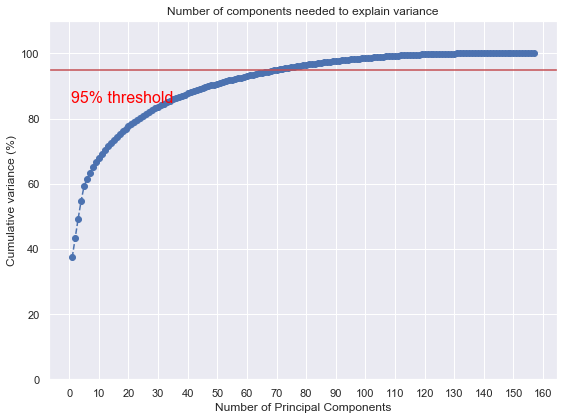

In [4]:
# 'aisle' data set
plotPCAvariance(cust_train_rescale, cust_train_rescale.shape[1])

#### PCA model, 95% variance

In [5]:
pca = PCA(n_components = 0.95).fit(cust_train_rescale)
cust_train_reduced = pca.transform(cust_train_rescale)
print(f'Number of components was reduced to {cust_train_reduced.shape[1]}')

Number of components was reduced to 71


#### Export reduced dataset to csv

In [6]:
pd.DataFrame(cust_train_reduced, index=cust_train_rescale.index).to_csv('../Outputs/customer_order_train_reduced.csv')

### Generate all customer reduced dataset

In [8]:
cust_rescale = pd.read_csv('../Outputs/customer_order_rescale.csv', index_col='user_id')
print(f'There are {len(cust_rescale):,} customers in entire data set')

There are 206,209 customers in entire data set


In [9]:
cust_reduced = pca.transform(cust_rescale)
pd.DataFrame(cust_reduced, index=cust_rescale.index).to_csv('../Outputs/customer_order_reduced.csv')